In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [11]:
mnist = tf.keras.datasets.mnist
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()
X_train = X_train / 255.0
X_test = X_test / 255.0

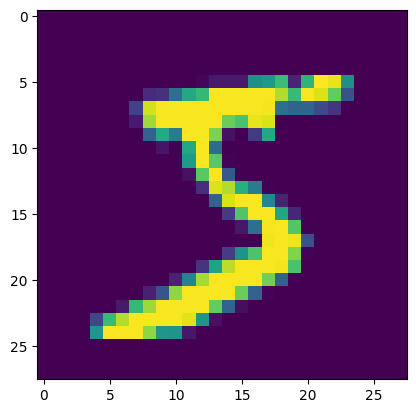

In [3]:
plt.imshow(X_train[0])

In [21]:
model_ml = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64,activation="relu"),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10,activation="softmax")
])

model_ml.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

result_ml = model_ml.fit(X_train,Y_train,epochs=5,validation_data=(X_test,Y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8154 - loss: 0.6005 - val_accuracy: 0.9592 - val_loss: 0.1410
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9476 - loss: 0.1745 - val_accuracy: 0.9671 - val_loss: 0.1025
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9599 - loss: 0.1372 - val_accuracy: 0.9725 - val_loss: 0.0937
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9671 - loss: 0.1130 - val_accuracy: 0.9732 - val_loss: 0.0935
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9696 - loss: 0.1033 - val_accuracy: 0.9761 - val_loss: 0.0818


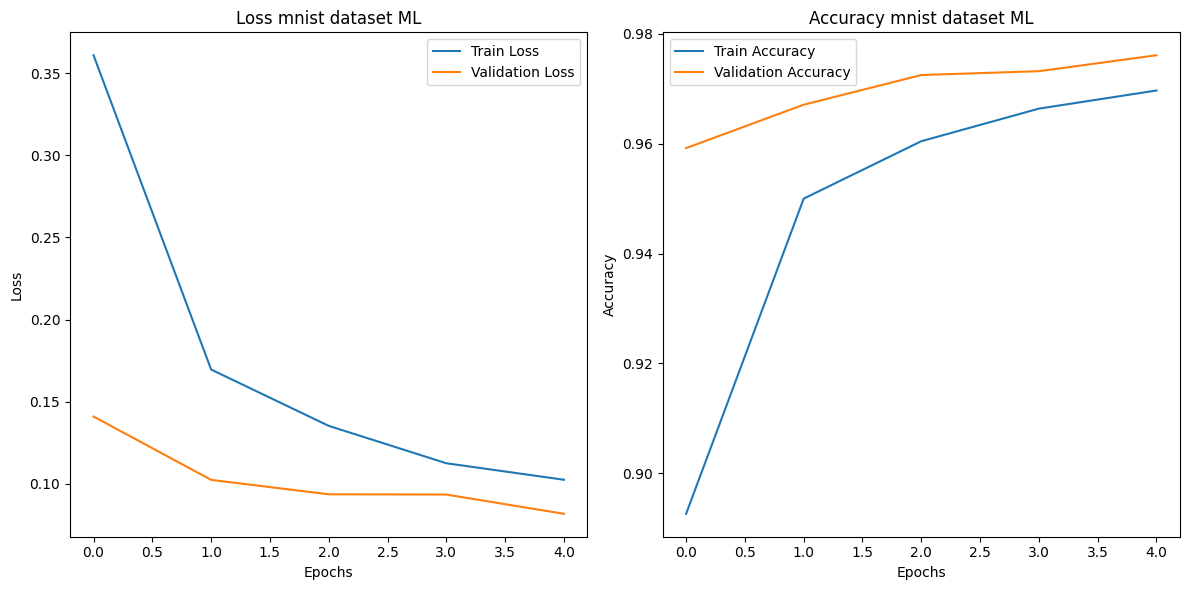

In [22]:

plt.figure(figsize=(12, 6))

# Loss
plt.subplot(1, 2, 1)
plt.plot(result_ml.history['loss'], label='Train Loss')
plt.plot(result_ml.history['val_loss'], label='Validation Loss')
plt.title('Loss mnist dataset ML')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(result_ml.history['accuracy'], label='Train Accuracy')
plt.plot(result_ml.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy mnist dataset ML')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [24]:
model_DL = tf.keras.models.Sequential([
    # CNN
    tf.keras.layers.Conv2D(32,(3,3),activation="relu",input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32,(3,3),activation="relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(16,(3,3),activation="relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),

    # ML
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10,activation="softmax")
])

model_DL.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

result_DL = model_DL.fit(X_train.reshape(-1,28,28,1),Y_train,epochs=5,validation_data=(X_test.reshape(-1,28,28,1),Y_test))


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7472 - loss: 0.7421 - val_accuracy: 0.9657 - val_loss: 0.1094
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9543 - loss: 0.1516 - val_accuracy: 0.9731 - val_loss: 0.0867
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9656 - loss: 0.1176 - val_accuracy: 0.9721 - val_loss: 0.0885
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9707 - loss: 0.1001 - val_accuracy: 0.9733 - val_loss: 0.0857
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9742 - loss: 0.0852 - val_accuracy: 0.9812 - val_loss: 0.0635


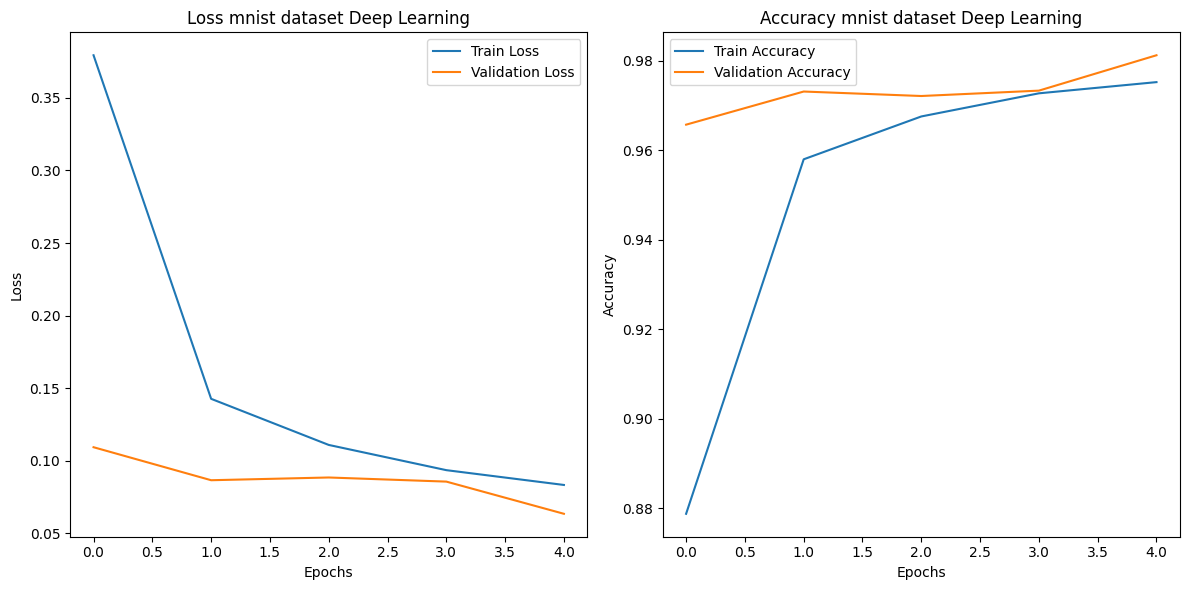

In [25]:

plt.figure(figsize=(12, 6))

# Loss
plt.subplot(1, 2, 1)
plt.plot(result_DL.history['loss'], label='Train Loss')
plt.plot(result_DL.history['val_loss'], label='Validation Loss')
plt.title('Loss mnist dataset Deep Learning')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(result_DL.history['accuracy'], label='Train Accuracy')
plt.plot(result_DL.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy mnist dataset Deep Learning')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
